In [1]:
import numpy as np
np.random.seed(42)
import pandas as pd
from scipy.stats import ttest_ind
from numba import njit, jit
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [2]:
meta = pd.read_csv('../data/META_SL.csv')

In [3]:
meta['plat'].unique()

array(['Agilent', 'Illumina_NGS', 'Affymetrix_U133', 'Illumina_Chip',
       'Affymetrix_HUG', 'Affymetrix_PRV'], dtype=object)

In [4]:
meta

,CN,type,plat,TP
0,C_1,Solid tumor,Agilent,Solid tumor_Agilent
1,C_2,Solid tumor,Agilent,Solid tumor_Agilent
2,C_3,Solid tumor,Agilent,Solid tumor_Agilent
3,C_4,Solid tumor,Agilent,Solid tumor_Agilent
4,C_5,Solid tumor,Agilent,Solid tumor_Agilent
...,...,...,...,...
7162,C_7163,C,Affymetrix_PRV,C_Affymetrix_PRV
7163,C_7164,D,Affymetrix_PRV,D_Affymetrix_PRV
7164,C_7165,D,Affymetrix_PRV,D_Affymetrix_PRV
7165,C_7166,D,Affymetrix_PRV,D_Affymetrix_PRV


#### Данные, на которых нужно проверить гипотезу

In [5]:
data = pd.read_csv('D:/data/Q.csv')

In [6]:
data.head()

,C_1,C_2,C_3,C_4,C_5,C_6,C_7,C_8,C_9,C_10,...,C_7158,C_7159,C_7160,C_7161,C_7162,C_7163,C_7164,C_7165,C_7166,C_7167
A2M,1696.363794,1272.838543,1308.190264,2519.139406,2114.814689,1459.532841,1669.181792,1652.525047,1780.898730,947.634344,...,1631.665781,1605.084608,2890.777186,2890.777186,2880.215223,3003.624493,2311.683106,2325.297138,2367.203427,2259.214746
AACS,546.539824,472.073309,506.443490,534.444653,534.444653,463.629070,441.094774,474.416321,548.448995,560.498508,...,182.037174,173.597215,133.660947,120.615059,120.055872,135.165941,149.065122,151.069740,144.729251,144.887109
AAK1,12.873127,14.966506,6.762433,6.343552,7.357948,4.744648,5.365942,7.544583,6.002238,19.328869,...,631.785030,593.145885,231.473931,203.392708,195.399226,210.356694,422.649129,438.307052,462.875905,497.737802
AAMP,972.023322,805.485253,832.221760,985.191603,1434.322897,790.076966,810.713769,788.410239,1093.794843,1699.828193,...,711.614205,698.964247,644.800548,659.838170,614.400586,684.707827,638.532024,669.016972,672.543665,693.811412
AANAT,237.574005,170.780177,111.544330,126.745840,162.549081,52.178830,52.772775,147.934407,115.222926,327.352048,...,12.542203,10.567379,7.160839,9.311171,5.821076,8.926863,9.084144,8.181865,10.090490,6.988138


In [7]:
data.columns = meta['CN']

In [8]:
data.head()

CN,C_1,C_2,C_3,C_4,C_5,C_6,C_7,C_8,C_9,C_10,...,C_7158,C_7159,C_7160,C_7161,C_7162,C_7163,C_7164,C_7165,C_7166,C_7167
A2M,1696.363794,1272.838543,1308.190264,2519.139406,2114.814689,1459.532841,1669.181792,1652.525047,1780.898730,947.634344,...,1631.665781,1605.084608,2890.777186,2890.777186,2880.215223,3003.624493,2311.683106,2325.297138,2367.203427,2259.214746
AACS,546.539824,472.073309,506.443490,534.444653,534.444653,463.629070,441.094774,474.416321,548.448995,560.498508,...,182.037174,173.597215,133.660947,120.615059,120.055872,135.165941,149.065122,151.069740,144.729251,144.887109
AAK1,12.873127,14.966506,6.762433,6.343552,7.357948,4.744648,5.365942,7.544583,6.002238,19.328869,...,631.785030,593.145885,231.473931,203.392708,195.399226,210.356694,422.649129,438.307052,462.875905,497.737802
AAMP,972.023322,805.485253,832.221760,985.191603,1434.322897,790.076966,810.713769,788.410239,1093.794843,1699.828193,...,711.614205,698.964247,644.800548,659.838170,614.400586,684.707827,638.532024,669.016972,672.543665,693.811412
AANAT,237.574005,170.780177,111.544330,126.745840,162.549081,52.178830,52.772775,147.934407,115.222926,327.352048,...,12.542203,10.567379,7.160839,9.311171,5.821076,8.926863,9.084144,8.181865,10.090490,6.988138


In [9]:
data = data.astype(float)

In [10]:
data.head()

CN,C_1,C_2,C_3,C_4,C_5,C_6,C_7,C_8,C_9,C_10,...,C_7158,C_7159,C_7160,C_7161,C_7162,C_7163,C_7164,C_7165,C_7166,C_7167
A2M,1696.363794,1272.838543,1308.190264,2519.139406,2114.814689,1459.532841,1669.181792,1652.525047,1780.898730,947.634344,...,1631.665781,1605.084608,2890.777186,2890.777186,2880.215223,3003.624493,2311.683106,2325.297138,2367.203427,2259.214746
AACS,546.539824,472.073309,506.443490,534.444653,534.444653,463.629070,441.094774,474.416321,548.448995,560.498508,...,182.037174,173.597215,133.660947,120.615059,120.055872,135.165941,149.065122,151.069740,144.729251,144.887109
AAK1,12.873127,14.966506,6.762433,6.343552,7.357948,4.744648,5.365942,7.544583,6.002238,19.328869,...,631.785030,593.145885,231.473931,203.392708,195.399226,210.356694,422.649129,438.307052,462.875905,497.737802
AAMP,972.023322,805.485253,832.221760,985.191603,1434.322897,790.076966,810.713769,788.410239,1093.794843,1699.828193,...,711.614205,698.964247,644.800548,659.838170,614.400586,684.707827,638.532024,669.016972,672.543665,693.811412
AANAT,237.574005,170.780177,111.544330,126.745840,162.549081,52.178830,52.772775,147.934407,115.222926,327.352048,...,12.542203,10.567379,7.160839,9.311171,5.821076,8.926863,9.084144,8.181865,10.090490,6.988138


#### Код Стьюдента

In [11]:
rng = np.random.default_rng()

In [12]:
def get_splitted_columns(columns):
    shuffled = rng.permutation(columns)
    columns_1 = shuffled[:len(columns) // 2]
    columns_2 = shuffled[len(columns) // 2:]
    return columns_1, columns_2

In [13]:
def split_for_f(gene, columns_1, columns_2):
    sample_1 = gene[columns_1].values
    sample_2 = gene[columns_2].values
    return f(sample_1, sample_2)

$$
f_g = sign(\overline{D}_g - \overline{H}_g) \cdot (-lg(P_g))
$$

In [14]:
# @njit
def f(sample_1, sample_2):
    sign = np.sign(sample_1.mean() - sample_2.mean())
    p_value = ttest_ind(sample_1, sample_2)[1]
    return sign * (-np.log1p(p_value))

In [15]:
def calc_corr(data, fixed_cols, splitting_cols):
    cols_1, cols_2 = get_splitted_columns(splitting_cols)
    
    f_1 = data.apply(split_for_f, args=(fixed_cols, cols_1), axis=1)
    f_2 = data.apply(split_for_f, args=(fixed_cols, cols_2), axis=1)
    
    return f_1.corr(f_2)

In [16]:
# %time calc_corr(data, plat_1, plat_2)

#### Перебор всех пар платформ

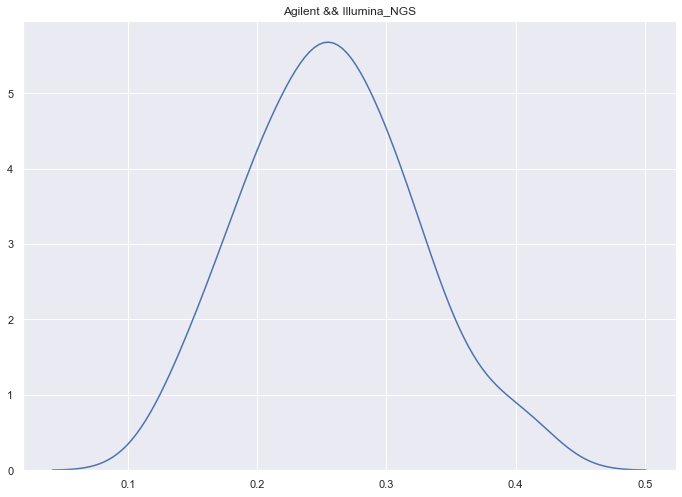

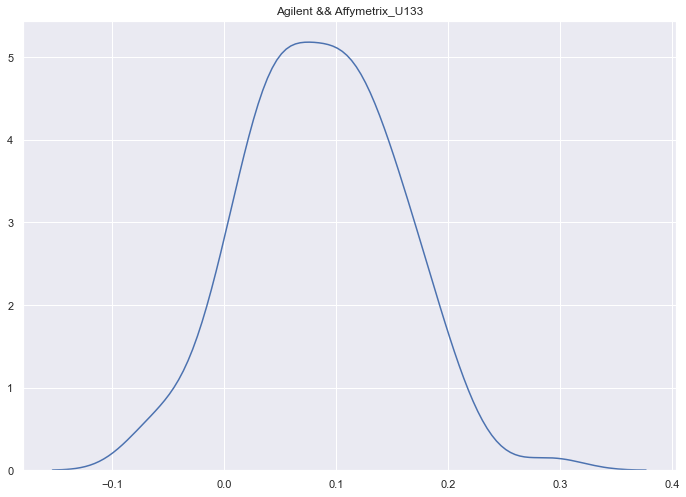

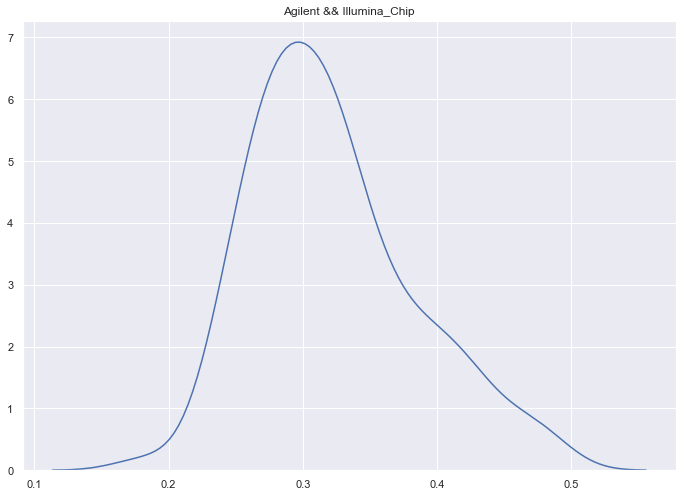

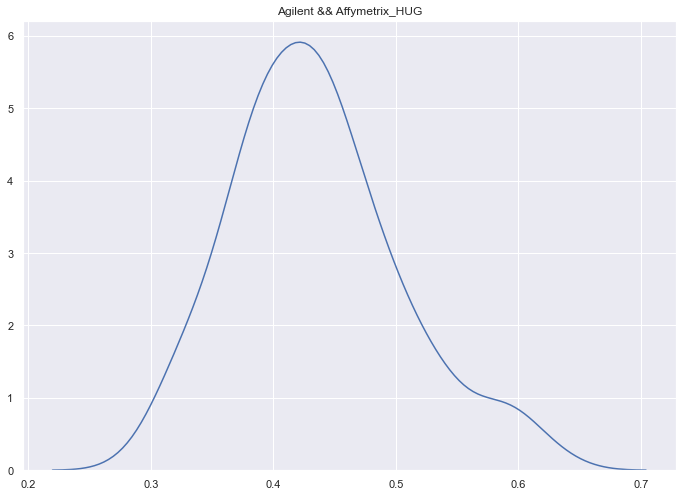

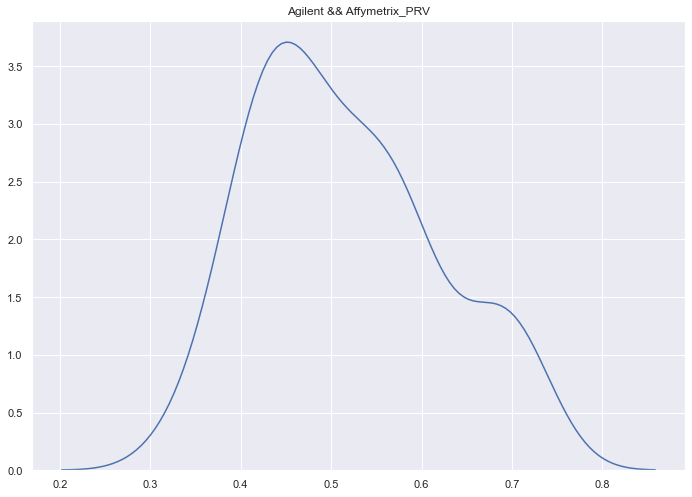

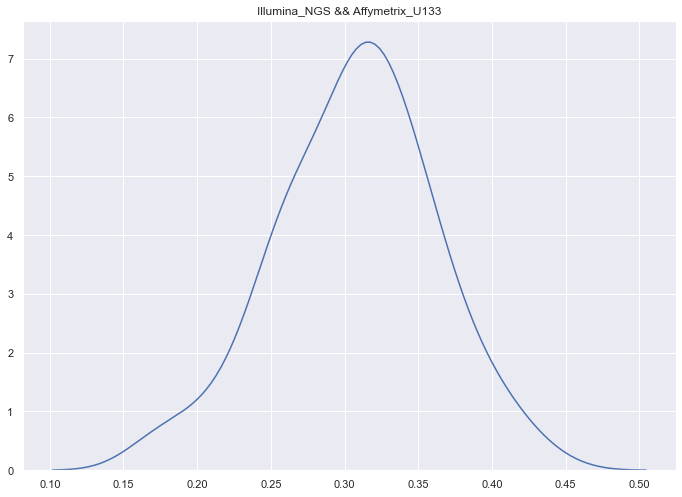

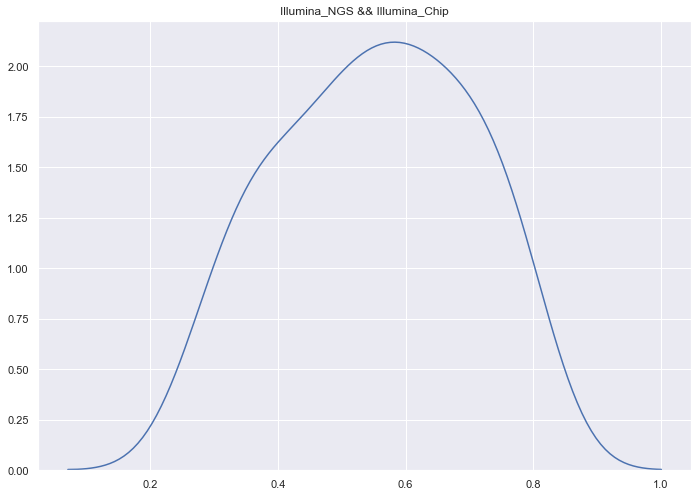

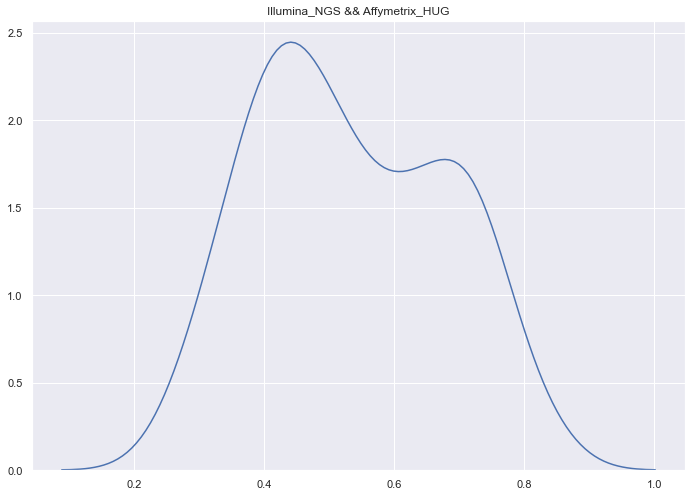

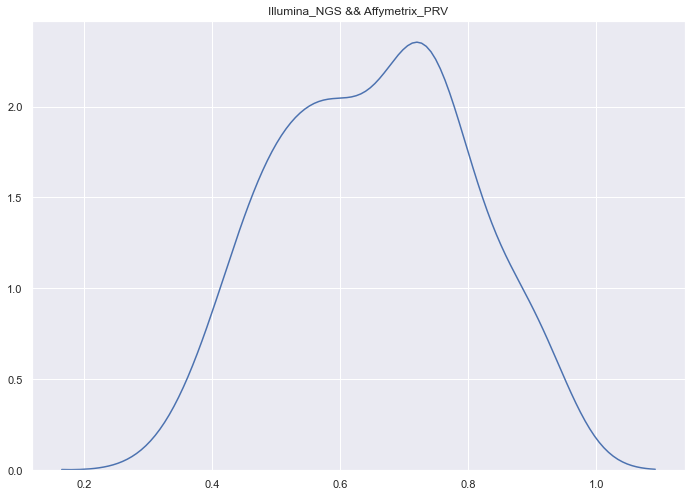

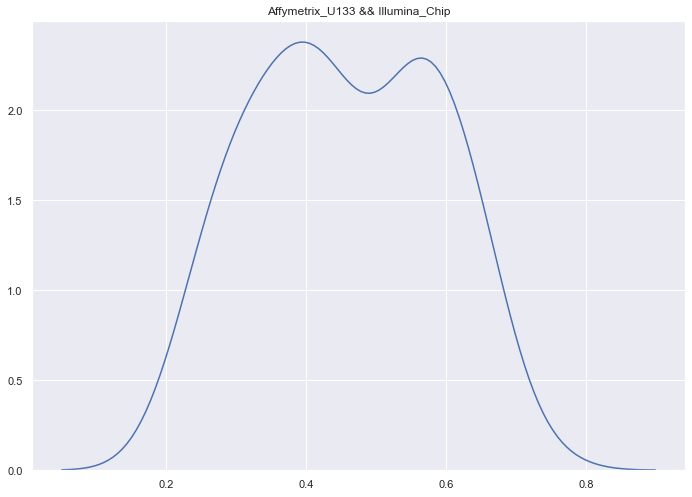

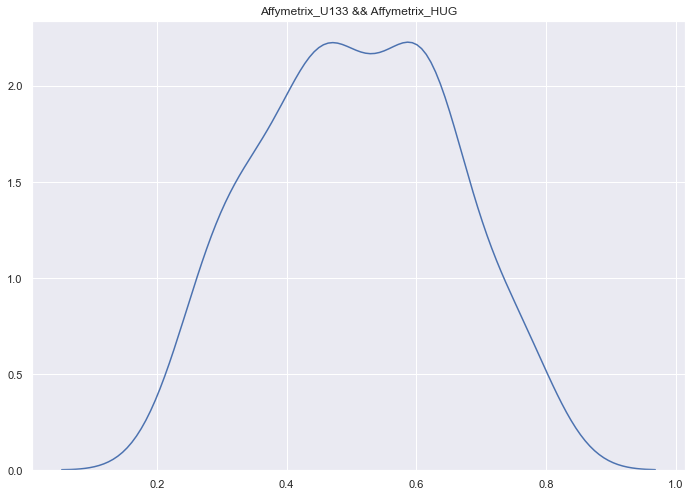

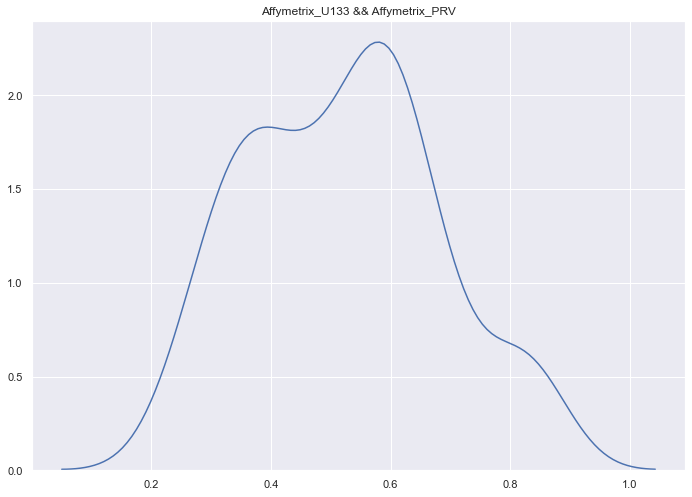

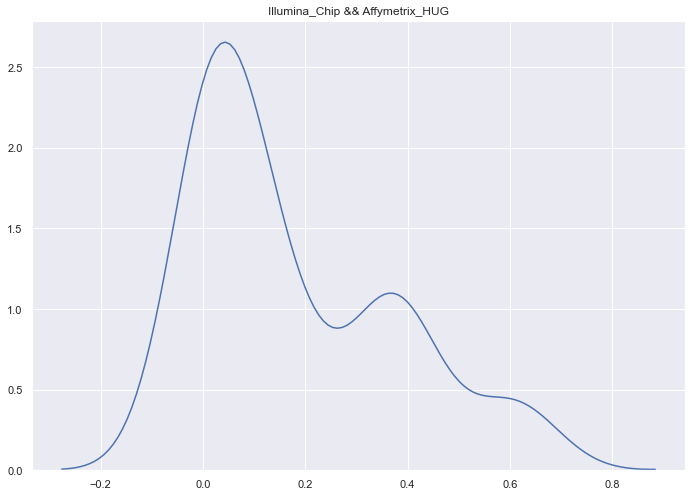

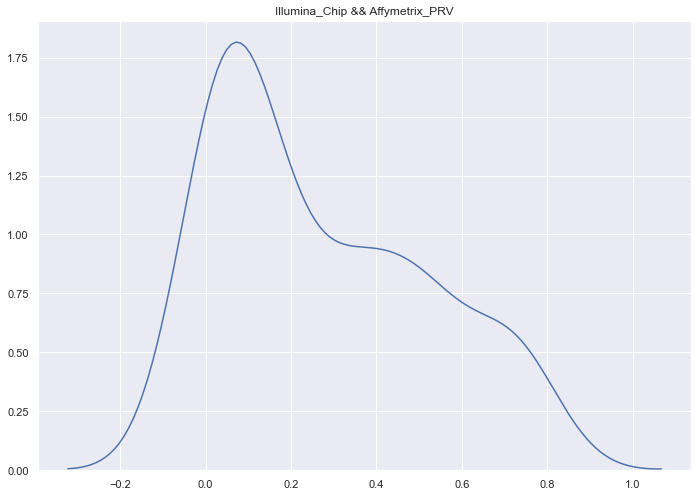

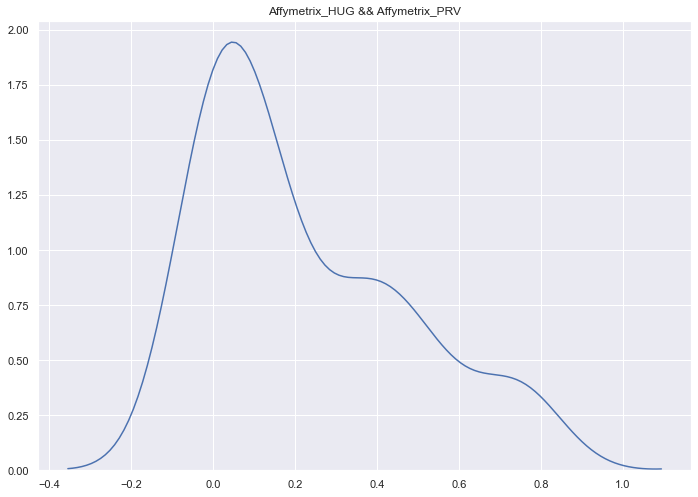

In [17]:
for idx_1, title_1 in enumerate(meta['plat'].unique()):
    for idx_2, title_2 in enumerate(meta['plat'].unique()):
        
        if(idx_2 > idx_1):
            
            plat_1 = meta[meta['plat'] == title_1]['CN']
            plat_2 = meta[meta['plat'] ==  title_2]['CN']
            
            corrs = [calc_corr(data, plat_1, plat_2) for i in range(100)]
            
            plt.figure()
            plt.title(title_1 + " && " + title_2)
            sns.distplot(corrs, hist=False)